# PRACTICE QUESTION

1. Read the MNIST dataset. Split it into train and test data (80-20).
2. Perform PCA on the data and plot the test accuracy with increasing dimensions of the data. (Use the 1-nn classifier)

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('mnist_data.csv', names=range(784), header=None)
labels = pd.read_csv('mnist_labels.csv', names=['labels'])
data['labels'] = labels

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

In [12]:
result = []
# Data Transformation
pca = PCA(n_components=100)
X_train_new = pd.DataFrame(pca.fit_transform(X_train))
X_test_new = pd.DataFrame(pca.transform(X_test))

for i in range(1,100):
    train_data = X_train_new[X_train_new.columns[:i]]
    test_data = X_test_new[X_train_new.columns[:i]]
    
    #Model
    clf = KNeighborsClassifier(1)
    clf.fit(train_data, y_train)
    pred = clf.predict(test_data)
    result.append(accuracy_score(pred, y_test))

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


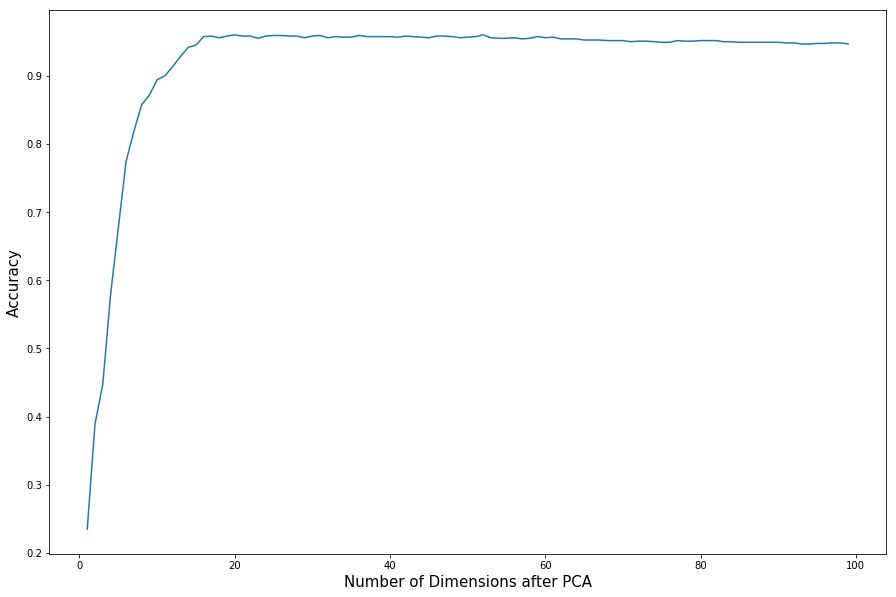

In [16]:
plt.figure(figsize=(15,10))
plt.xlabel('Number of Dimensions after PCA', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(range(1,100), result)

In [ ]:
# fitting again vs columns?